In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
import missingno as mns

In [2]:
df= pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.drop('loan_id',axis = 1, inplace=True)

In [4]:
cat = df.select_dtypes(include=['object','category'])
for col in cat:
    print(df[col].unique())

[' Graduate' ' Not Graduate']
[' No' ' Yes']
[' Approved' ' Rejected']


In [17]:
df[' education'] = df[' education'].map({' Graduate':1,' Not Graduate':2})
df[' self_employed'] = df[' self_employed'].map({' No':1,' Yes':2})

In [18]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,1,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,2,2,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,1,1,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,1,1,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,2,2,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
num = df.select_dtypes(include=['int','float'])
for col in num:
    print(df[col].unique())

[2 0 3 5 4 1]
[9600000 4100000 9100000 8200000 9800000 4800000 8700000 5700000  800000
 1100000 2900000 6700000 5000000 1900000 4700000  500000 2700000 6300000
 5800000 6500000 4900000 3100000 2400000 7000000 9000000 8400000 1700000
 1600000 8000000 3600000 1500000 7800000 1400000 4200000 5500000 9500000
 7300000 3800000 5100000 4300000 9300000 7400000 8500000 8800000 3300000
 3900000 8300000 5600000 5300000 2600000  700000 3500000 9900000 3000000
 6800000 2000000 1000000  300000 6600000 9400000 4400000  400000 6200000
 9700000 7100000  600000 7200000  900000  200000 1800000 4600000 2200000
 2500000 8600000 4000000 5200000 8900000 1300000 4500000 8100000 9200000
 2800000 7500000 6400000 6900000 7700000 3200000 7900000 5900000 3400000
 2100000 3700000 5400000 2300000 7600000 6000000 6100000 1200000]
[29900000 12200000 29700000 30700000 24200000 13500000 33000000 15000000
  2200000  4300000 11200000 22700000 11600000 31500000  7400000 10700000
  1600000  9400000 10300000 14600000 1940000

In [6]:
num.columns

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')

In [21]:
x = df.drop([' loan_status'], axis = 1)
y = df[' loan_status']

In [25]:
model = RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

              precision    recall  f1-score   support

    Approved       1.00      1.00      1.00      2656
    Rejected       1.00      1.00      1.00      1613

    accuracy                           1.00      4269
   macro avg       1.00      1.00      1.00      4269
weighted avg       1.00      1.00      1.00      4269

1.0


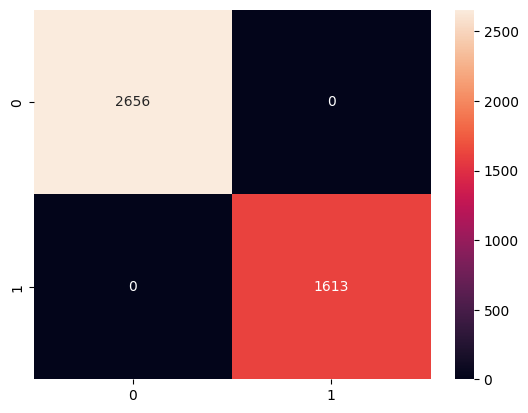

In [27]:
pred = model.predict(x)
print(classification_report(y, pred))
cm3 = confusion_matrix(y, pred)
sns.heatmap(cm3, annot=True, fmt = '0.5g')
print(accuracy_score(y, pred))

In [29]:
import pickle
data = {'model':model}
with open('LoanModel.pkl','wb') as file:
    pickle.dump(data, file)